# <center>LAB5 机器学习作业<br > 决策树和随机森林</center>

## 目标
学习决策树、随机森林、集成学习。

## LAB Assignment
This lab introduces classical machine learning algorithms, decision trees (DTs) and their ensemble learning (e.g., Random Forests). Decision trees are important non-parameter learning methods. Although DTs are simple and limited, they still can achieve excellent performance using ensemble learning schemes.

For this lab assignment, we'll use the algorithms we've learned today to fit the model and evaluate the model’s prediction performance. The scikit-learn package will be used to save your time.


### Decision tree
- <font size=4>Step 1. load iris dataset </font>

Datasets: First, we load the scikit-learn iris toy dataset .

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
iris = datasets.load_iris()
dir(iris), iris.data.shape, iris.target.shape, iris.feature_names, iris.target_names

(['DESCR',
  'data',
  'data_module',
  'feature_names',
  'filename',
  'frame',
  'target',
  'target_names'],
 (150, 4),
 (150,),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [2]:
import translators as ts
print(ts.youdao(iris.DESCR, sleep_seconds=5, timeout=None, proxies=None, to_language='zh'))
iris.DESCR

Using state California server backend.


．．  _iris_dataset: 
 虹膜植物数据集 -------------------- 
 * *数据集特征:* * 
 :实例数量:150(三个类各50个) :属性数量:4个数值，预测属性和类 :属性信息: -萼片长度，单位为厘米 -萼片宽度，单位为厘米 -花瓣长度，单位为厘米 -花瓣宽度，单位为厘米 -类: ——Iris-Setosa ——Iris-Versicolour ——Iris-Virginica 
 摘要统计信息: 
 ============== ==== ==== ======= ===== ==================== 最小最大平均SD类相关性 ============== ==== ==== ======= ===== ==================== 萼片长度:4.3 7.9 5.84 0.83 0.7826 萼片宽度:2.0 4.4 3.05 0.43 -0.4194 花瓣长度:1.0 6.9 3.76 1.76 0.9490(高!) 花瓣宽度:0.1 2.5 1.20 0.76 0.9565(高!) ============== ==== ==== ======= ===== ==================== 
 :属性值:无 类别分布:3个类别各占33.3%。 :创造者:费舍尔 捐赠者:迈克尔·马歇尔(Marshall %PLU@io.arc.nasa.gov) :日期:1988年7月 
 著名的虹膜数据库，首先由R.A.费雪爵士使用。 数据集被取走 从费舍尔的论文。 注意，它与R中的相同，但与UCI中的不同 机器学习仓库，有两个错误的数据点。 
 这可能是最著名的数据库 模式识别文学。 费雪的论文在这一领域堪称经典 直到今天还经常被提及。 (例如，参见Duda & Hart。) 的 数据集包含3个类，每个类有50个实例，其中每个类引用一个 鸢尾植物的类型。 一类与另一类是线性可分的; 的 后者彼此之间不是线性可分的。 
 ．．  主题:引用 
 -费舍尔,R.A. 分类学问题中多重度量的使用 年度优生学，7，第二部分，179-188 (1936); 也在“贡献。 数理统计”(John Wiley, NY, 1950)。 ——杜达，r.o.， &哈特，P.E.(1973)模式分类和场景分析。 (Q

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

- <font size=4> Step 2. Define the features and the target </font>

In [3]:
# X = iris.data[:,2:]
X = iris.data
y = iris.target

- <font size=4> Step 3. Visualization </font>

    We need to use proper visualization methods to have an intuitive understanding.

    For visualization, only the last 2 attributes are used.


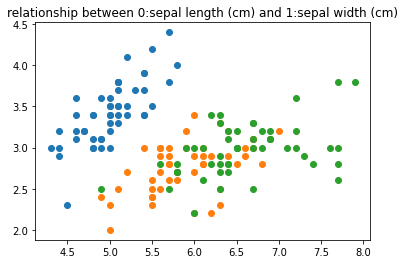

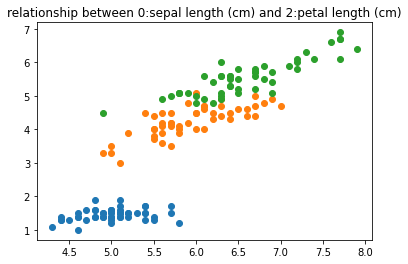

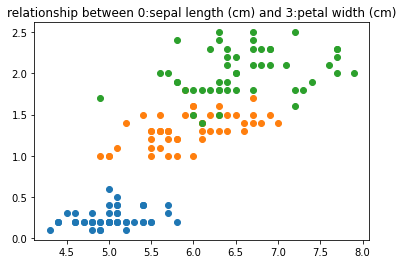

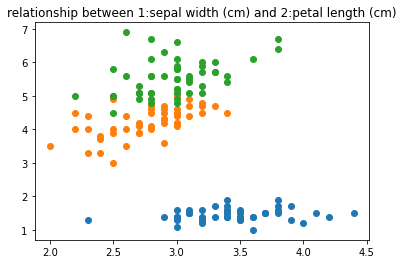

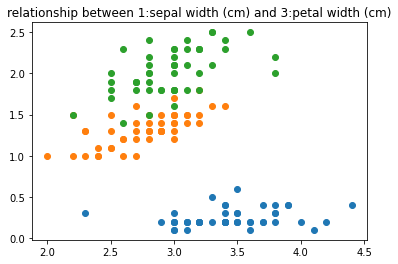

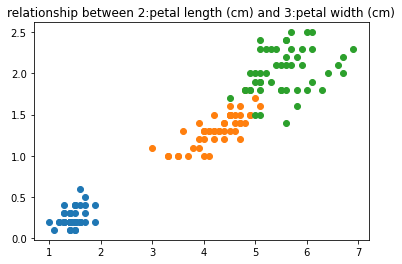

In [4]:
def draw_scatter(featureIndexA, featureIndexB):
    plt.figure()
    for targetIndex in range(len(iris.target_names)):
        plt.scatter(X[y==targetIndex, featureIndexA], X[y==targetIndex, featureIndexB])
# 选择X的前两个特征，画出三个类
for i in range(len(iris.feature_names)):
    for j in range(i+1, len(iris.feature_names)):
        draw_scatter(i, j)
        plt.title(f'relationship between {i}:{iris.feature_names[i]} and {j}:{iris.feature_names[j]}')
        plt.show()

In [5]:
# 从图中可以看出，2和3组成的特征更加容易区分这个数据集。

- <font size=4> Step 4. Preprocessing data </font>
Please check whether the data needs to be preprocessed

In [6]:
########### Write Your Code Here ###########
# 不需要做任何改动
############################################

- <font size=4> Step 5. Split the dataset into train and test sets </font>
  
 Now we divide the whole dataset into a training set and a test set using the the scikit-learn model_selection module.

In [7]:
########### Write Your Code Here ###########
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)
[i.shape for i in  (X_train, X_test, y_train, y_test)]
############################################

[(120, 4), (30, 4), (120,), (30,)]

- <font size=4> Step 6. Explore the model parameters </font>
  
Decision trees are quite easy to use, but they are prone(倾向于) to overfit the training data. Actually almost all the non-parameter learning methods suffer from this problem. We can use pruning to optimize our trained decision trees; we can also adjust the super parameters to avoid overfitting.
参数化模型：假说可以通过一个定长参数向量描述，概括了训练数据，一般可以丢弃训练数据。
非参数化模型：不能用有限参数集合刻画的函数，基于示例学习或基于存储学习。
aima认为k近邻和svm算是非参数化模型，对决策树没有说。
过度拟合的原因其实是假说空间和属性数目增长。
    There are so many arguments and they are all helpful in adjusting the algorithm parameters to achieve the balance between bias and variance.  
    Adjust these parameters: `criterion`,`max_depth`, `min_samples_leaf`,  `min_samples_split` , `max_leaf_nodes `,`min_impurity_split `
    and explain how it affects the bias and variance of the classification results. 

In [27]:
########### Write Your Code Here ###########
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
def evaluate(pipeline, data, target):
    X_train, X_test, y_train, y_test = train_test_split(data, target)
    # pipeline.fit(X_train, y_train)
    scores = cross_val_score(pipeline, X_train, y_train) # 没有指定estimator，使用模型默认的estimator，就是R2。
    return scores.mean()

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
clf = DecisionTreeClassifier(criterion='gini', 
                             splitter='best', 
                             max_depth=None, 
                             min_samples_split=2, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features=None, 
                             random_state=None, 
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             class_weight=None, 
                             ccp_alpha=0.0)
pipe_clf = Pipeline([('clf', clf)])
evaluate(pipe_clf, X, y)
############################################

0.9557312252964426

In [10]:
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
distributions = dict(criterion=['gini', 'entropy', 'log_loss'], 
                     splitter=["best", "random"], 
                     max_depth=randint(low=1, high=5),
                     min_samples_split = randint(low=2, high=10),
                     min_samples_leaf = randint(low=1, high=10),
                     max_features=['sqrt', 'log2', None], # 'auto'是废弃的
                     random_state=[666],
                     ccp_alpha=uniform(loc=0, scale=0.1))
clf = RandomizedSearchCV(DecisionTreeClassifier(), 
                         distributions, random_state=666)
search = clf.fit(X_train, y_train)
search.best_score_, search.best_params_                     

(0.9416666666666667,
 {'ccp_alpha': 0.06667374651361047,
  'criterion': 'gini',
  'max_depth': 2,
  'max_features': None,
  'min_samples_leaf': 4,
  'min_samples_split': 7,
  'random_state': 666,
  'splitter': 'random'})

    Finally, select the best set of parameters for the following steps.

- <font size=4> Step 7. Use the model of your choice on the test set </font>


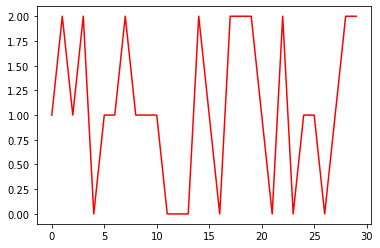

In [11]:
########### Write Your Code Here ###########
from scipy.stats import describe
# print(search.score(X_train, y_train), search.score(X_test, y_test))
y_pred = search.predict(X_test)
describe(y_pred)
plt.plot(y_pred, 'r')
############################################

- <font size=4> Step 8. Evaluate the model </font>

best DecisionTreeClassifier accuracy = 1.0
fper=[0. 0. 1.], tper=[0. 1. 1.], thresholds=[2. 1. 0.]


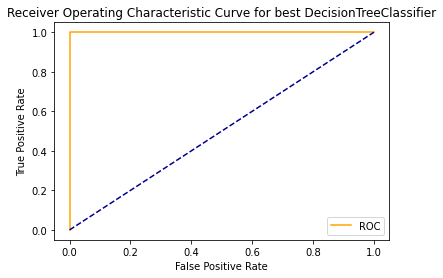

best DecisionTreeClassifier accuracy = 1.0
fper=[0.         0.         0.         0.55555556 1.        ], tper=[0.         0.08333333 1.         1.         1.        ], thresholds=[2.         1.         0.86666667 0.05263158 0.        ]


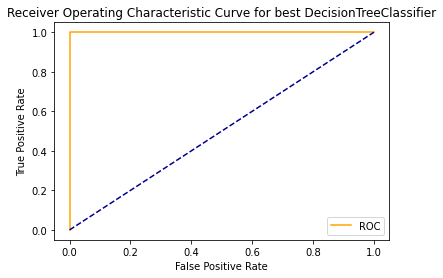

best DecisionTreeClassifier accuracy = 1.0
fper=[0.   0.   0.55 1.  ], tper=[0. 1. 1. 1.], thresholds=[1.94736842 0.94736842 0.13333333 0.        ]


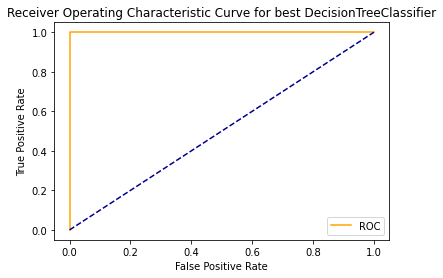

[None, None, None]

In [12]:
########### Write Your Code Here ###########
from sklearn.metrics import accuracy_score
# Evaluating Model
from sklearn.metrics import confusion_matrix, accuracy_score, fbeta_score, classification_report, roc_auc_score, roc_curve
def evaluate_multiclass(model, y_test, pos_class=0, algs_name=None):
    if algs_name is None:
        algs_name = model.__name__
    y_pred = model.predict(X_test) 
    print(f'{algs_name} accuracy = {accuracy_score(y_pred,y_test)}')
    try:
        y_prob = model.predict_proba(X_test)[:,pos_class]
    except:
        y_prob = model.decision_function(X_test)
    y_test_new = y_test.copy()
    y_test_new[y_test==pos_class] = 1
    y_test_new[y_test!=pos_class] = 0
    fper, tper, thresholds = roc_curve(y_test_new, y_prob, pos_label=1)
    # print(f'{algs_name} f_score = {fbeta_score(y_pred,y_test, beta=1)}')
    plt.figure()
    plt.plot(fper, tper, color='orange', label='ROC')
    print(f'fper={fper}, tper={tper}, thresholds={thresholds}')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic Curve for {algs_name}')
    plt.legend()
    plt.show()
[evaluate_multiclass(search, y_test, pos_label, 'best DecisionTreeClassifier') for pos_label in range(3)]
############################################

In [13]:
# 上面三个图，分别是把标签0，1，2分别作为正类，画出ROC曲线。
# 可以看出泛化性能非常好。
# 其实这是因为predict_prob的结果大部分情况下非零即1。
# 选择标签2的概率是0.94是因为决策树最后一层节点没有分完，直接剪枝了，然后这一层节点有0.94的概率是标签2。
[describe(search.predict_proba(X_test)[:, i]) for i in range(3)]

[DescribeResult(nobs=30, minmax=(0.0, 1.0), mean=0.26666666666666666, variance=0.20229885057471264, skewness=1.0552897060221735, kurtosis=-0.8863636363636358),
 DescribeResult(nobs=30, minmax=(0.0, 1.0), mean=0.368654970760234, variance=0.17974925618138915, skewness=0.41137802916141974, kurtosis=-1.8042910165156696),
 DescribeResult(nobs=30, minmax=(0.0, 0.9473684210526315), mean=0.3646783625730993, variance=0.17865226081942104, skewness=0.6528985874144779, kurtosis=-1.4984542549160509)]

- <font size=4> Step 9. Visual decision boundary and generated decision tree </font>

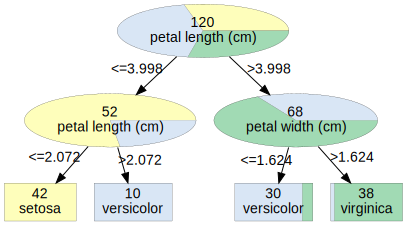

In [14]:
########### Write Your Code Here ###########
from draw_dt import draw_tree
draw_tree(search.best_estimator_, X, y, iris.feature_names, iris.target_names)
############################################

### Random forest

In this section, you are required to use random forests for classification. Thus, in `scikit-learn`, there are two ways to implement a random forset, from the Bagging view and from the RF view.<br>
Classify `iris`  using `BaggingClassifier( )` and `RandomForestClassifier( )` respectively, 
- Compare the performances of two  methods, and select different parameters for model  and evaluate the model using bias and variance

In [35]:
########### Write Your Code Here ###########
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=300,
                                random_state=666, # random attributes subset
                                oob_score=True,
                                # n_jobs=-1
                               )
evaluate(rf_clf, X, y) # 刚才上面我们自己定义的函数，自动进行交叉验证。

0.9557312252964426

In [31]:
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=300,
                                bootstrap=True, # using bootstrap sampling method
                                oob_score=True, # use oob data for scoring
                                # n_jobs=-1 # use paralell computing
                               )
evaluate(bagging_clf, X, y) # 可见，bagging性能更好。

0.9458498023715416

In [38]:
# 计算bias和variance
rf_clf.fit(X_train, y_train)
bagging_clf.fit(X_train, y_train)
describe(rf_clf.predict_proba(X_test)[:, 0]),  describe(bagging_clf.predict_proba(X_test)[:, 0])

(DescribeResult(nobs=30, minmax=(0.0, 1.0), mean=0.26522222222222225, variance=0.20016987228607921, skewness=1.0562287156571906, kurtosis=-0.8830279055998851),
 DescribeResult(nobs=30, minmax=(0.0, 1.0), mean=0.26666666666666666, variance=0.20229885057471264, skewness=1.0552897060221735, kurtosis=-0.8863636363636358))

### Other ensemble learning
For classification, we have many models to choose . Please don't just pick a model to train and say it's good enough. We need to select models based on some metrics, such as choosing models with low bias and low variance.

In this part, you are required  to use `AdaBoost` and `Gradient boosting`.Compare their performances with decision tree and random forest, and finally select the best model  and the optimal  parameters for iris classification.




In [45]:
########### Write Your Code Here ###########
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
models = [AdaBoostClassifier(), GradientBoostingClassifier()]
print([evaluate(model, X, y) for model in models])
############################################

[0.9205533596837945, 0.9557312252964426]


In [52]:
[model.fit(X_train, y_train) for model in models]
def bias(y, y_pred):
    return np.mean(y != y_pred)
[bias(y_test, model.predict(X_test)) for model in models]

[0.0, 0.0]

In [60]:
def variance(model, estimators, X):
    mean = model.predict(X)
    pres = np.array([estimator.predict(X) for estimator in estimators])
    return np.mean((pres-mean).mean()**2)
[variance(model, model.estimators_, X_test) for model in models[:1]]

[0.007056000000000001]


<font size=4>Hint: About how to select models and parameters:</font>
- Select model using cross validation. Compare the scores in the training set and the validation set. If they are good enough, use the model in the test set.
- Calculate the bias and variance of each model to further analyze your chosen model.
- Select parameters using cross validation
  
### Questions:
(1) Can decision trees and random forests be used for unsupervised clustering or data dimension reduction? Why?

(a) 可以聚类，但是不常用。 
决策树本身是监督学习，在有标签的情况下算信息增益哪个大。本来不适合聚类。
但是聚类属于无监督学习的一种，按照郝老师的解读，无监督学习的本质是
Ax = y， 不知道y的情况下，可以先让y=y0，解出A0， 然后让y1=A0x；接下来用y1求A1，以此类推。可以使用决策树作为"A"的过程。
具体而言，这一篇科学网博客有讲通过决策树进行聚类的过程。
https://blog.sciencenet.cn/blog-867801-740462.html
(b) 可以降维
先用决策树进行训练，可以看到决策树从信息增益的角度，优先选择树没有那么深的时候选择的那几个特征，这些特征就是最重要的特征。所以可以用这些特征作为降维后的特征，而被决策树丢弃的特征就可以丢弃。

(2) What is the difference between the bias and variance of a model?
首先我们假设总体是服从一个条件概率分布的，然后我们数据集是一个抽样。
采样有很多种，所有可能的采样训练出来的模型输出的平均值和真实总体期望的差距就是bias，偏差。
而这些采样的可能性不同，得到了所有的不同模型的输出，这一列数据的方差就是variance，方差。
这两个指标只对集成学习有效果。集成学习就是说取多个数据集的子集来独立训练相同模型类型的多个不同模型。

(2) What are the strengths of the decision tree/random forest methods; when do they perform well?
决策树和随机森林的优点是：
1. 可以处理非线性数据，因为决策树是一种非线性模型。
2. 可以处理缺失值，因为决策树是一种贪心算法，每次都是选择信息增益最大的特征，而不是选择特征值最大的特征。
3. 可以处理多分类问题，因为决策树是一种多叉树。
4. 可以处理多输出问题，因为决策树是一种多叉树。
5. 模型简单、可解释性强、可以可视化、训练速度快。
当数据集中的特征之间的关系比较复杂的时候，决策树和随机森林的表现会比较好。

(3) What are the weaknesses of the decision tree/random forest methods; when do they perform poorly?
缺点是：
1. 容易过拟合，因为决策树是一种贪心算法，每次都是选择信息增益最大的特征，而不是选择特征值最大的特征。所以如果数据集中的特征之间的关系比较复杂，决策树容易过拟合。
2. 容易受到异常值的影响，因为决策树是一种贪心算法，每次都是选择信息增益最大的特征，而不是选择特征值最大的特征。所以如果数据集中的特征之间的关系比较复杂，决策树容易受到异常值的影响。
当数据集噪声比较大的时候，决策树和随机森林的表现会比较差。

(4) What makes the decision tree/random forest a good candidate for the classification/regression problem, if you have enough knowledge about the data?
如果数据集中的特征之间的关系比较复杂，决策树和随机森林的表现会比较好。

## Conclusion
- Decision trees are prone to overfitting, but random forest algorithm prevents overfitting.
- Random forest algorithm is comparatively time-consuming, whereas decision tree algorithm gives fast results.
- There are many arguments for either base decision trees or the whole ensemble algorithm.  A good ensemble algorithm should make sure that base ones are both accurate and diversified.  So it is better to get a set of good enough base tree parameters before training the ensemble learning algorithm. 

## References
https://scikit-learn.org/stable/